In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

#file path
file_path = r'E:\data set\IMDb Movies India.csv'

# Load the CSV file
data = pd.read_csv(file_path, sep=',', encoding='latin-1')
data1=pd.DataFrame(data)

In [5]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data1.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## task to do

 Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.


The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

In [8]:
data1.shape

(15509, 10)

In [9]:
data1.Name.unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

## data cleaning

In [10]:
data1.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data Preprocessing

In [12]:
# replacing the brackets from the year column
data1['Year']=data1['Year'].str.replace(r'[()]','',regex=True)


In [13]:
data1['Year']=data1['Year'].fillna(data1['Year'].median())

In [14]:
#converting year into float type
data1['Year']=data1['Year'].astype(float)

In [15]:
# remove the min word from the duration column and and convert all vlaues to numeric
data1['Duration']=pd.to_numeric(data1['Duration'].str.replace('min',''))

In [16]:
#filling meadian values in place of NaN calues into Duration
data1['Duration']=data1['Duration'].fillna(data1['Duration'].median())

In [17]:
data1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [18]:
# Convert 'Votes' to numeric, removing commas
data1['Votes'] = data1['Votes'].replace('[\$,]', '', regex=True).replace('M', '', regex=True).astype(float)

In [19]:
# Display the unique values in 'Votes' to ensure it's cleaned
data1['Votes'].unique()

array([       nan, 8.0000e+00, 3.5000e+01, ..., 7.0344e+04, 4.0800e+02,
       1.4960e+03])

In [20]:
# Handling missing values: Fill missing values for 'Duration' with the median value
data1['Duration']=data1['Duration'].fillna(data1['Duration'].median())

In [21]:
# Fill missing values for 'Votes' with 0 (assuming no votes is better than dropping the row)
data1['Votes'] = data1['Votes'].fillna(0)

In [22]:
data1.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [23]:
# for categorical variables with missing values , we can fill the placeholder with 'unknown'
data1['Genre']=data1['Genre'].fillna('unknown')
data1['Director']=data1['Director'].fillna('unknown')
data1['Actor 1']=data1['Actor 1'].fillna('unknown')
data1['Actor 2']=data1['Actor 2'].fillna('unknown')
data1['Actor 3']=data1['Actor 3'].fillna('unknown')

In [24]:
# Display the cleaned data and check for any remaining missing values
cleaned_data = data1
remaining_missing_values = cleaned_data.isnull().sum()

In [25]:
cleaned_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,0.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [26]:
# filling rating with median where there is null values
cleaned_data['Rating']=cleaned_data['Rating'].fillna(cleaned_data['Rating'].median())

In [27]:
cleaned_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [28]:
cleaned_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,0.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Feature Engineering

In [29]:
# Extract the first genre if there are multiple genres
cleaned_data['Genre']=cleaned_data['Genre'].str.split(',').str[0]

In [30]:
# Encode categorical variables using one-hot encoding
encoded_data=pd.get_dummies(cleaned_data,columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [31]:
encoded_data.head()

,Name,Year,Duration,Rating,Votes,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Actor 3_unknown
0,,1991.0,131.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,2021.0,90.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019.0,110.0,4.4,35.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,2010.0,105.0,6.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X=encoded_data.drop(columns=['Name','Rating'])
y=encoded_data['Rating']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [33]:
encoded_data['Genre_Action'].unique


<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
15504    1
15505    1
15506    1
15507    1
15508    1
Name: Genre_Action, Length: 15509, dtype: uint8>

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

#initialize the model
regressor=RandomForestRegressor(n_estimators=100,random_state=42)

#train the model
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred=regressor.predict(X_test)

# Ensure the shapes match
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (4653,)
Shape of y_pred: (4653,)


In [36]:
# calculate the performance metrics
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"the r2 score is: {r2}")

Mean Squared Error: 0.6398506501182033
the r2 score is: 0.34934854991711917


In [37]:
encoded_data.shape

(15509, 20398)

# Data visualization

###  Distribution of ratings:

Text(0, 0.5, 'frequency')

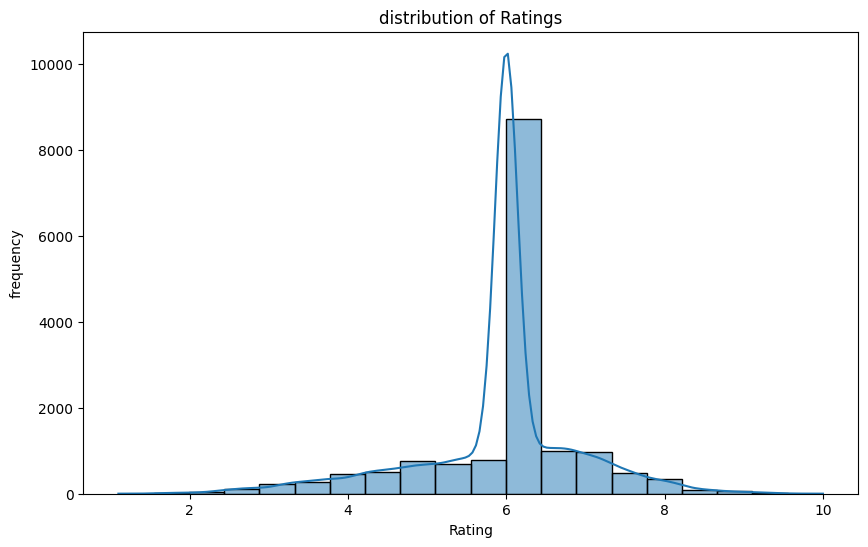

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(encoded_data['Rating'],bins=20,kde=True)
plt.title('distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('frequency')

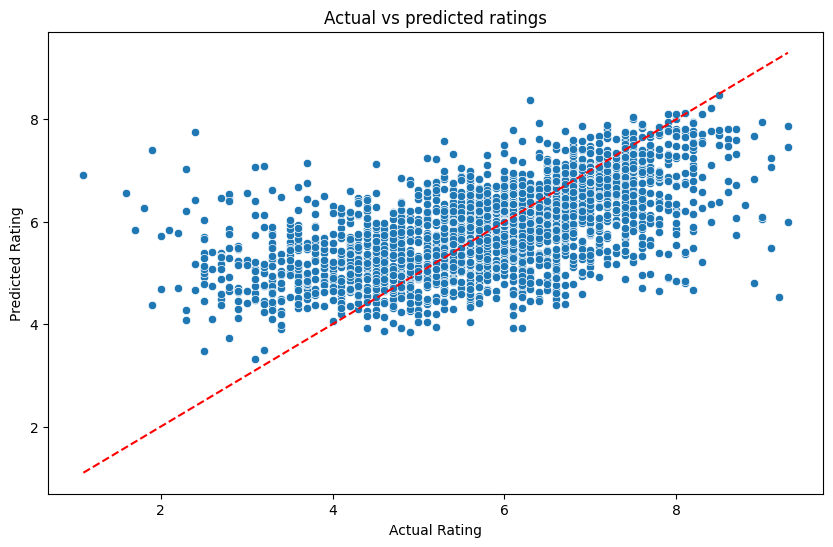

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs predicted ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()


In [40]:
# Feature importance from the random forest model
importances = regressor.feature_importances_
feature_names = X.columns


In [41]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

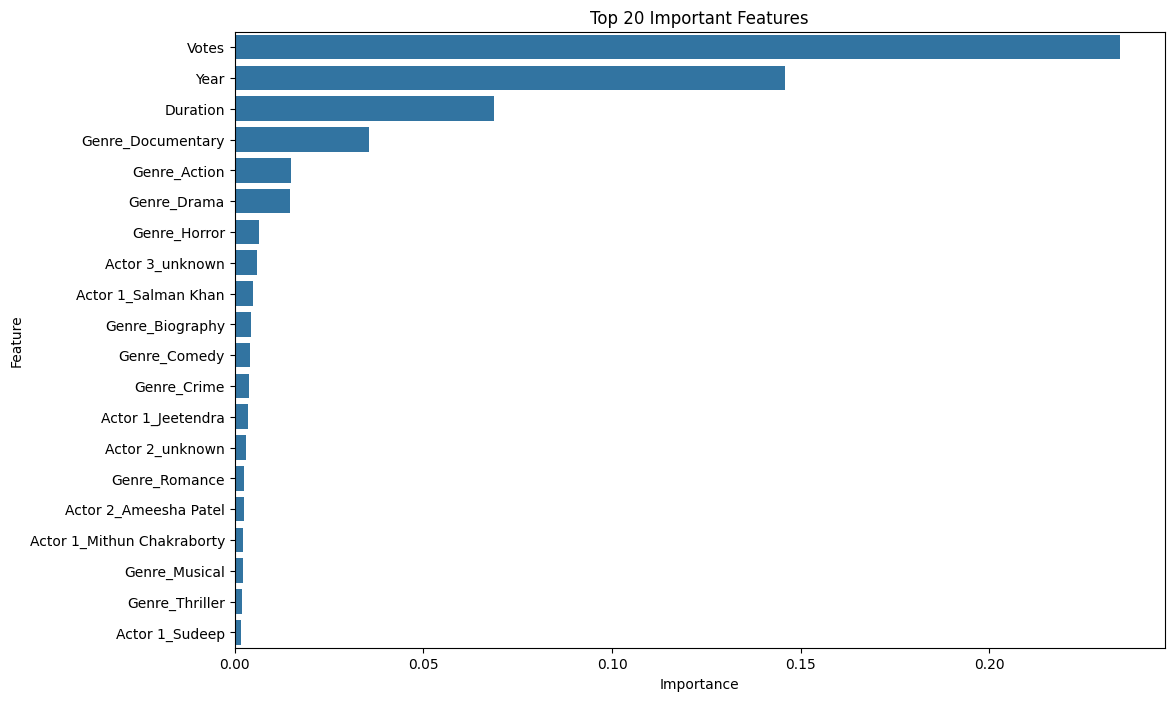

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26124\1066898294.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_data.corr()


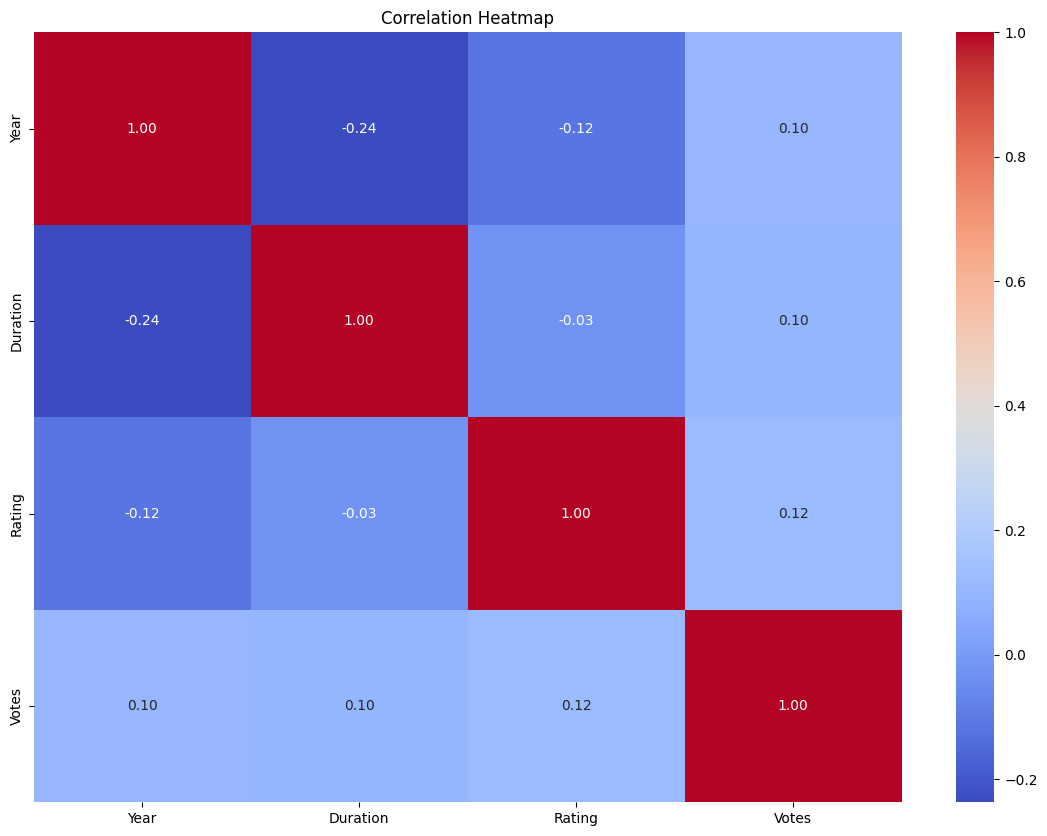

In [43]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

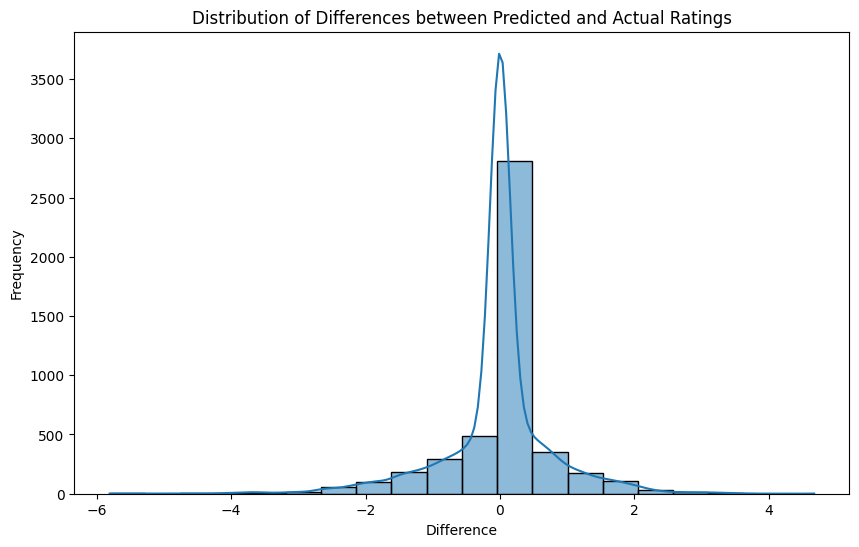

In [44]:
# Predicted vs Actual Ratings Histogram
differences = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(differences, bins=20, kde=True)
plt.title('Distribution of Differences between Predicted and Actual Ratings')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

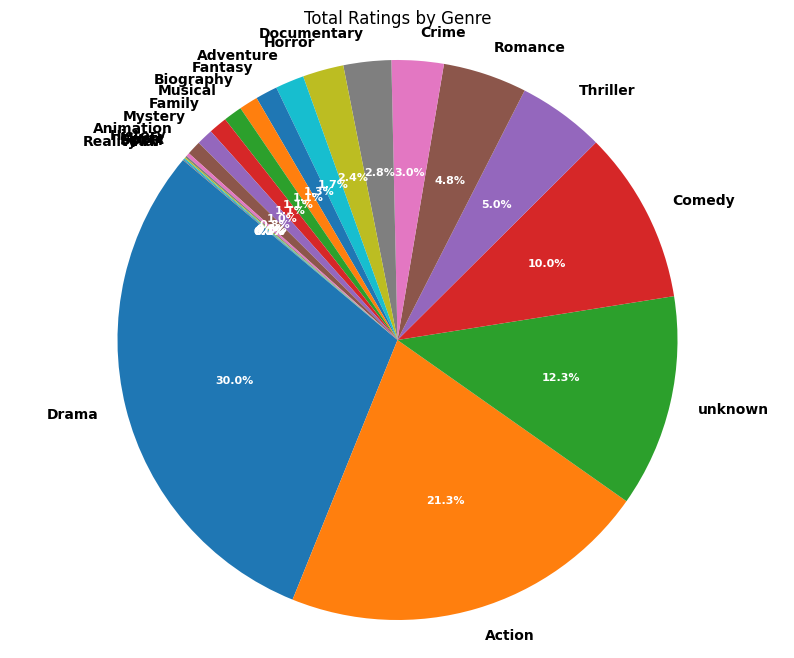

In [53]:
import matplotlib.pyplot as plt

# Group by genre and sum the ratings
genre_rating = data.groupby('Genre')['Rating'].sum()

# Sort the genres by total ratings in descending order
genre_ratings = genre_rating.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(genre_ratings, labels=genre_ratings.index, autopct='%1.1f%%', startangle=140)

# Rotate the genre labels by 45 degrees
for text in texts:
    text.set_rotation(0)

# Style the text properties
plt.setp(texts, size=10, weight="bold")
plt.setp(autotexts, size=8, weight="bold", color="white")

plt.title('Total Ratings by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Here’s a detailed report on building a model to predict movie ratings based on features like genre, director, and actors using regression techniques:

---

## Movie Rating Prediction Report

### Objective
The objective of this project is to analyze historical movie data and develop a regression model that accurately estimates the ratings of movies based on features such as genre, director, and actors.

### Data Overview
The dataset used for this analysis contains the following columns:
- **Name**: The name of the movie
- **Year**: The release year of the movie
- **Duration**: The duration of the movie
- **Genre**: The genre(s) of the movie
- **Rating**: The rating of the movie (target variable)
- **Votes**: The number of votes the movie received
- **Director**: The director of the movie
- **Actor 1, Actor 2, Actor 3**: The main actors in the movie

### Data Cleaning and Preprocessing
1. **Handling Missing Values**: Missing values in numerical columns (`Duration`, `Votes`) were filled with the median value. Missing values in categorical columns (`Genre`, `Director`, `Actor 1`, `Actor 2`, `Actor 3`) were filled with 'Unknown'. Rows with missing `Rating` values were dropped.
2. **Data Type Conversion**: The `Year`, `Duration`, and `Votes` columns were converted to appropriate numerical types.
3. **Feature Engineering**: 
    - Extracted the first genre if multiple genres were present.
    - Encoded categorical variables (`Genre`, `Director`, `Actor 1`, `Actor 2`, `Actor 3`) using one-hot encoding.
4. **Data Splitting**: The data was split into training (80%) and testing (20%) sets.

### Model Building
A Random Forest Regressor was used to predict the movie ratings. The model was trained using the training set and evaluated on the testing set.

### Model Evaluation
The performance of the model was evaluated using the Mean Squared Error (MSE) and the R-squared (R²) score:
- **Mean Squared Error (MSE)**: 0.6398506501182033
- **R-squared (R²) Score**: 0.34934854991711917

### Interpretation of Results
- **Mean Squared Error (MSE)**: This metric indicates the average squared difference between the actual and predicted ratings. A lower MSE value indicates better model performance.
- **R-squared (R²) Score**: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score of 0.3493 means that approximately 34.93% of the variability in movie ratings can be explained by the model.


### Conclusion
The model provides a reasonable starting point for predicting movie ratings based on genre, director, and actors. However, with an R² score of approximately 0.3493, there is still substantial room for improvement. Future enhancements could include:
- Incorporating additional features such as screenplay, production company, and budget.
- Experimenting with more advanced regression techniques or ensemble methods.
- Conducting hyperparameter tuning to optimize model performance.

This project provides valuable insights into the factors that influence movie ratings and demonstrates the application of data analysis, preprocessing, feature engineering, and machine learning modeling techniques in a real-world scenario.
